### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'
import sys
sys.path.append(libPath)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

### Homogeneous Datafiles path

In [2]:
homogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/homogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-05_12-18-55grg60_zo/data_tf_disabled.pkl'
homogeneousLV15Comm15Path = '/home/mayank/ray_results/homogeneous-full-comm-LV15m-Comm-15m/PPO_v2i-v0_0_2019-11-05_19-37-35q9vbzp4w/data_tf_disabled.pkl'
idmData = '/home/mayank/ray_results/homogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-05_12-18-55grg60_zo/idmData.pkl'
#heterogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/heterogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-06_01-29-19wd1ehb7g/data_tf_disabled.pkl'


### Homogeneous no reaction time Datafiles path

In [3]:
homoNoReactIdmData = '/home/mayank/ray_results/homogeneous-no-reaction-time-only-local-view-15m/idmData.pkl'

# IDM vs no Reaction time IDM

In [4]:
idmDataHomo = loadPKL(idmData)
idmDataHomoNoReact = loadPKL(homoNoReactIdmData)

In [5]:
idmDataCars = {}

for carID in idmDataHomo[0][0].keys():
    idmDataCars[carID] = []

for episode in idmDataHomo[0].keys():
    #print(idmDataHomo[0][episode].keys())
    for carID in idmDataHomo[0][episode].keys():
        idmDataCars[carID].append(idmDataHomo[0][episode][carID])

In [6]:
idmDataCarsHomoNoReact = {}

for carID in idmDataHomoNoReact[0][0].keys():
    idmDataCarsHomoNoReact[carID] = []

for episode in idmDataHomoNoReact[0].keys():
    for carID in idmDataHomoNoReact[0][episode].keys():
        idmDataCarsHomoNoReact[carID].append(idmDataHomoNoReact[0][episode][carID])

<IPython.core.display.Javascript object>


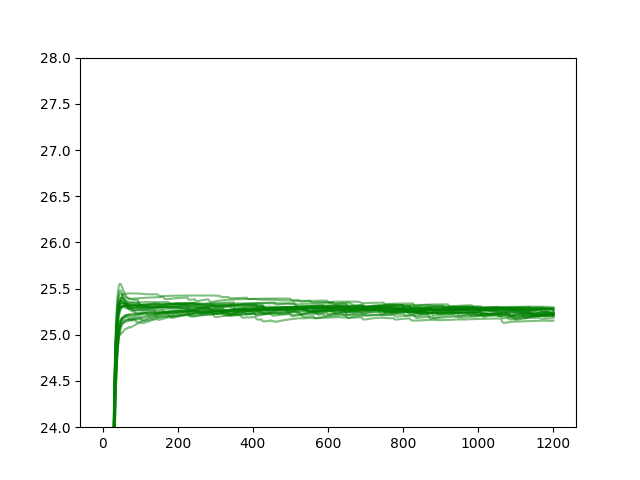

(24, 28)

In [24]:
for carID in idmDataCarsHomoNoReact.keys():
    speedData = np.array(idmDataCarsHomoNoReact[carID]).mean(axis=0)
    speedData *= 3.6
    plt.plot(speedData, alpha=0.5, color='green')

for carID in idmDataCars.keys():
    speedData = np.array(idmDataCars[carID]).mean(axis=0)
    speedData *= 3.6
    plt.plot(speedData, color='red', alpha=0.5)

plt.ylim([24, 28])

# Homogeneous - Only Local view 15m

In [6]:
homoLocalView15mData = loadPKL(homogeneousOnlyLocalView15mPath)

In [7]:
homoLocalView15mData['max-episode-length']

2400

In [7]:
agentSpeedEpisodesHomoLV15m = {}
agentSpeedEpisodesHomoLV15m['complete'] = {}
agentSpeedEpisodesHomoLV15m['uncomplete'] = {}

for carID in homoLocalView15mData['data']['0.4_0.4'][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLocalView15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['complete'][carID].append(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][carID])
    else:
        for carID in homoLocalView15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['uncomplete'][carID].append(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


2401
2401
2108
2401
2401
2401
355
2401
2401
2401
2088
59
2401
2401
2401
2401
33
467
2401
2401
2203
2401
1372
2289
2401
2401
342
2401
97
2401
2401
978
2401
2401
2401
2401
2401
866
83
535
2401
2401
60
144
2401
789
161
566
2401
1663
Percentage of full episodes :  57.99999999999999


# Homogeneous - LV 15m + Comm 15m

In [28]:
homoLV15mComm15mData = loadPKL(homogeneousLV15Comm15Path)

In [29]:
homoLV15mComm15mData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

In [10]:
agentSpeedEpisodesHomoLV15mComm15m = {}
agentSpeedEpisodesHomoLV15mComm15m['complete'] = {}
agentSpeedEpisodesHomoLV15mComm15m['uncomplete'] = {}

for carID in homoLV15mComm15mData['data']['0.4_0.4'][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15mComm15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data']['0.4_0.4']:
    episodeLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['complete'][carID].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][carID])
    else:
        for carID in homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


Percentage of full episodes :  57.99999999999999


# Plot all

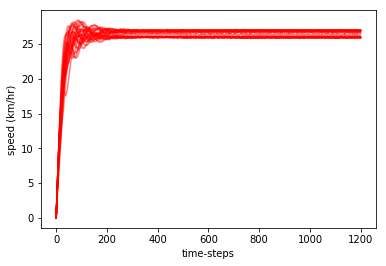

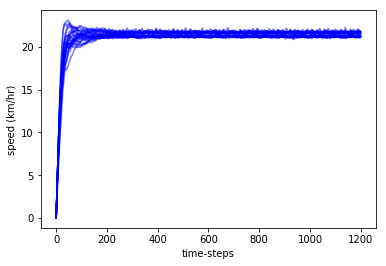

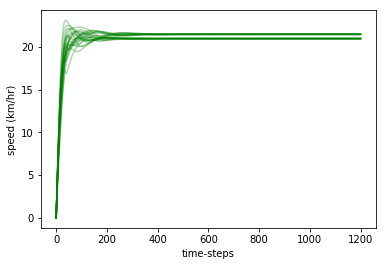

In [12]:
for carID in agentSpeedEpisodesHomoLV15mComm15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15mComm15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    plt.plot(speedData[0:1200], alpha=.5, color='red')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()

for carID in agentSpeedEpisodesHomoLV15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    plt.plot(speedData[0:1200], alpha=.5, color='blue')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()


for carID in idmDataCars.keys():
    speedData = np.array(idmDataCars[carID]).transpose()
    speedData = speedData.mean(axis=1)
    plt.plot(speedData * 3.6, color='green', alpha=0.3)
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
    #plt.legend()
plt.show()

# Querying

In [61]:
agentQueryEpisodesHomoLV15mComm15m = {}
agentQueryEpisodesHomoLV15mComm15m['complete'] = []
agentQueryEpisodesHomoLV15mComm15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data']['0.4_0.4']:
    episodeLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['actions'])
    else:
        agentQueryEpisodesHomoLV15mComm15m['uncomplete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['actions'][1])
    
    totalEpisodes += 1


In [62]:
# Encode actions and separate plan and query
agentPlanHomoLV15mComm15 = []
agentQueryHomoLV15mComm15 = []

for data in agentQueryEpisodesHomoLV15mComm15m['complete']:
    plantmp = []
    querytmp = []
    for step in data:
        plantmp.append(step[0])
        querytmp.append(step[1])
    agentPlanHomoLV15mComm15.append(plantmp)
    agentQueryHomoLV15mComm15.append(querytmp)

planEncode = {}
planEncode['acc'] = 0
planEncode['dec'] = 1
planEncode['do-nothing'] = 2
planEncode['lane-change'] = 3

queryEncode = {}
queryEncode['null'] = 0
queryEncode['reg_0'] = 1
queryEncode['reg_1'] = 2

for i, data in enumerate(agentPlanHomoLV15mComm15):
    for j, step in enumerate(agentPlanHomoLV15mComm15[i]):
        agentPlanHomoLV15mComm15[i][j] = planEncode[agentPlanHomoLV15mComm15[i][j]]

for i, data in enumerate(agentQueryHomoLV15mComm15):
    for j, step in enumerate(agentQueryHomoLV15mComm15[i]):
        agentQueryHomoLV15mComm15[i][j] = queryEncode[agentQueryHomoLV15mComm15[i][j]]


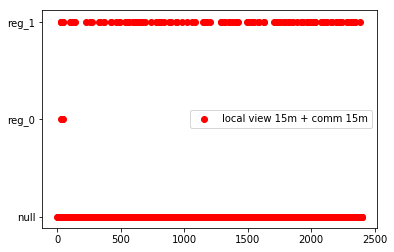

In [63]:
'''
for p in agentQueryHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentQueryHomoLV15mComm15[3])), agentQueryHomoLV15mComm15[3], color='red', label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
plt.legend()

([<matplotlib.axis.YTick at 0x7efe87cf3f28>,
 <a list of 4 Text yticklabel objects>)

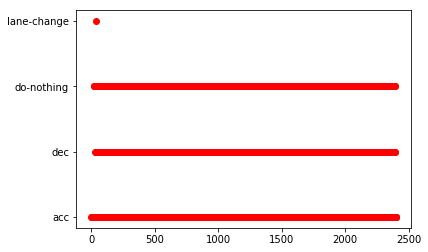

In [64]:
'''
for p in agentPlanHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[3])), agentPlanHomoLV15mComm15[3], color='red')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())

# Local view actions

In [65]:
agentQueryEpisodesHomoLocalView15m = {}
agentQueryEpisodesHomoLocalView15m['complete'] = []
agentQueryEpisodesHomoLocalView15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLocalView15m['complete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['actions'])
    else:
        agentQueryEpisodesHomoLocalView15m['uncomplete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['actions'][1])
    
    totalEpisodes += 1


In [66]:
agentPlanHomoLocalView15m = []

for data in agentQueryEpisodesHomoLocalView15m['complete']:
    plantmp = []
    for step in data:
        plantmp.append(step[0])
    agentPlanHomoLocalView15m.append(plantmp)

for i, data in enumerate(agentPlanHomoLocalView15m):
    for j, step in enumerate(agentPlanHomoLocalView15m[i]):
        agentPlanHomoLocalView15m[i][j] = planEncode[agentPlanHomoLocalView15m[i][j]]

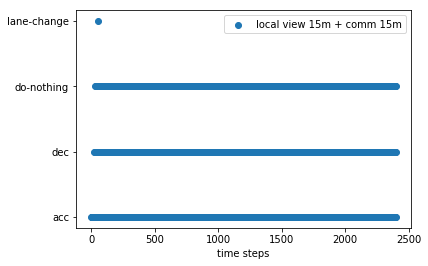

In [67]:
#plt.scatter(np.arange(0, len(agentPlanHomoLocalView15m[3])), agentPlanHomoLocalView15m[3], label='local view 15m')
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[2])), agentPlanHomoLV15mComm15[2], label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
plt.xlabel('time steps')
plt.legend()

# analyze agent speed initial for Local View and LV + Comm

In [20]:
lvSpeedOfAgent = []
for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    agentCarID = homoLocalView15mData['data']['0.4_0.4'][episode]['agentCarID']
    epLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][agentCarID])
    
    if epLen == (homoLocalView15mData['max-episode-length'] + 1):
        agentCarID = homoLocalView15mData['data']['0.4_0.4'][episode]['agentCarID']
        speedData = homoLocalView15mData['data']['0.4_0.4'][episode]['speed'][agentCarID]
        #print(speedData)
        lvSpeedOfAgent.append(speedData)

lvSpeedOfAgent = np.array(lvSpeedOfAgent)
print(lvSpeedOfAgent.shape)

(29, 2401)


In [21]:
lvSpeedOfAgent = lvSpeedOfAgent.mean(axis=0)
lvSpeedOfAgent *= 3.6
lvSpeedOfAgent.shape

(2401,)

In [22]:
lvCommSpeedOfAgent = []
for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    agentCarID = homoLV15mComm15mData['data']['0.4_0.4'][episode]['agentCarID']
    epLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][agentCarID])
    
    if epLen == (homoLV15mComm15mData['max-episode-length'] + 1):
        agentCarID = homoLV15mComm15mData['data']['0.4_0.4'][episode]['agentCarID']
        speedData = homoLV15mComm15mData['data']['0.4_0.4'][episode]['speed'][agentCarID]
        lvCommSpeedOfAgent.append(speedData)
    
lvCommSpeedOfAgent = np.array(lvCommSpeedOfAgent)
print(lvCommSpeedOfAgent.shape)

(29, 2401)


In [23]:
lvCommSpeedOfAgent = lvCommSpeedOfAgent.mean(axis=0)
lvCommSpeedOfAgent *= 3.6
print(lvCommSpeedOfAgent.shape)

(2401,)


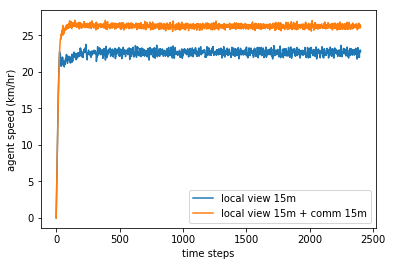

In [24]:
plt.plot(lvSpeedOfAgent, label='local view 15m')
plt.plot(lvCommSpeedOfAgent, label='local view 15m + comm 15m')
plt.xlabel('time steps')
plt.ylabel('agent speed (km/hr)')
plt.legend()

# Cars position graph

In [25]:
allCarsPos = {}
allCarsPos['complete'] = []
allCarsPos['uncomplete'] = []

carIDs = homoLocalView15mData['data']['0.4_0.4'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    posVector = homoLocalView15mData['data']['0.4_0.4'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLocalView15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPos['complete'].append(tmpDict.copy())

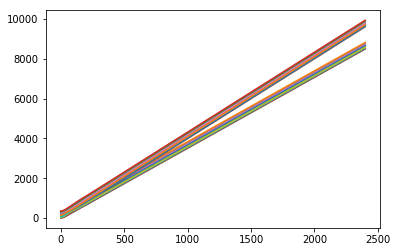

In [27]:
for episode in range(0, len(allCarsPos['complete'])):
    for carID in allCarsPos['complete'][episode].keys():
        plt.plot(allCarsPos['complete'][episode][carID])
    plt.show()
    break

In [9]:
allCarsPosComm15m = {}
allCarsPosComm15m['complete'] = []
allCarsPosComm15m['uncomplete'] = []

carIDs = homoLV15mComm15mData['data']['0.4_0.4'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    posVector = homoLV15mComm15mData['data']['0.4_0.4'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLV15mComm15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPosComm15m['complete'].append(tmpDict.copy())

In [12]:
for episode in range(0, len(allCarsPosComm15m['complete'])):
    for carID in allCarsPosComm15m['complete'][episode].keys():
        plt.plot(allCarsPosComm15m['complete'][episode][carID])
    plt.show()
    break

# Speed vs position Graph

In [136]:
# use previous plots data (just dont't take mean on axis=0)

In [141]:
print(lvSpeedOfAgent.shape)
print(lvPosVector.shape)
print(lvCommSpeedOfAgent.shape)
print(lvCommPosVector.shape)

(41, 2401)
(41, 2401)
(26, 2401)
(26, 2401)


<IPython.core.display.Javascript object>


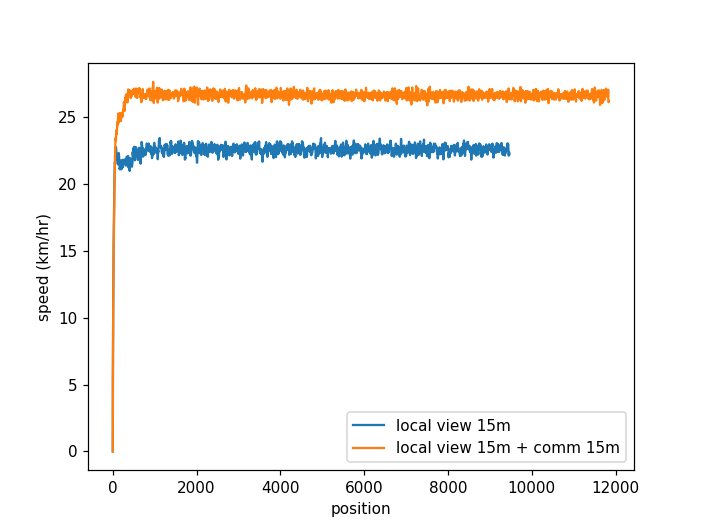

In [164]:
plt.plot(lvPosVector.mean(axis=0), lvSpeedOfAgent.mean(axis=0) * 3.6, label='local view 15m')
plt.plot(lvCommPosVector.mean(axis=0), lvCommSpeedOfAgent.mean(axis=0) *3.6, label='local view 15m + comm 15m')
plt.xlabel('position')
plt.ylabel('speed (km/hr)')
plt.legend()

# Distance to vehicle in front and back

### Homo Local view

In [8]:
frontDist = {}
frontDist['complete'] = []

for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    epLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['frontDiff'])
    
    if epLen == homoLocalView15mData['max-episode-length']:
        frontDist['complete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['frontDiff'])

In [9]:
frontDist['complete'] = np.array(frontDist['complete'])
print(frontDist['complete'].shape)

(35, 2400)


In [10]:
backDist = {}
backDist['complete'] = []

for episode in homoLocalView15mData['data']['0.4_0.4'].keys():
    epLen = len(homoLocalView15mData['data']['0.4_0.4'][episode]['backDiff'])
    
    if epLen == homoLocalView15mData['max-episode-length']:
        backDist['complete'].append(homoLocalView15mData['data']['0.4_0.4'][episode]['backDiff'])

In [11]:
backDist['complete'] = np.array(backDist['complete'])
print(backDist['complete'].shape)

(35, 2400)


In [12]:
backDist['complete'].mean(axis=0).shape
frontDist['complete'].mean(axis=0).shape

(2400,)

In [77]:
episodeToPlot = 2

Text(0.5, 1.0, 'Local View 15m')

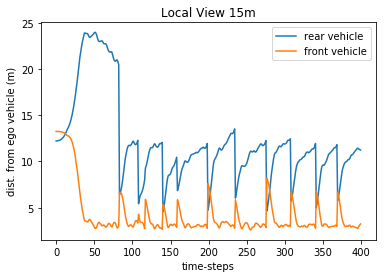

In [78]:
plt.plot(backDist['complete'][episodeToPlot][0:400], label='rear vehicle')
plt.plot(frontDist['complete'][episodeToPlot][0:400], label='front vehicle')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.xlabel('time-steps')
plt.title('Local View 15m')

In [68]:
len(agentPlanHomoLocalView15m)

35

In [69]:
len(backDist['complete'])

35

In [70]:
len(agentPlanHomoLocalView15m[episodeToPlot])

2400

In [79]:
mask = np.zeros((len(agentPlanHomoLocalView15m[episodeToPlot]),))
for idx, act in enumerate(agentPlanHomoLocalView15m[episodeToPlot]):
    if planEncode['lane-change'] == act:
        mask[idx] = 1.0
mask = np.multiply(mask, backDist['complete'][episodeToPlot])

(1, 40)

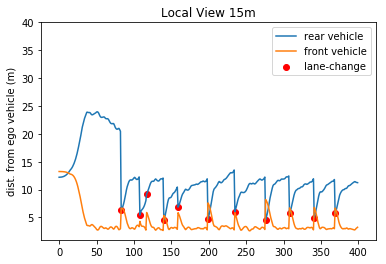

In [80]:
plt.plot(backDist['complete'][episodeToPlot][0:400], label='rear vehicle')
plt.plot(frontDist['complete'][episodeToPlot][0:400], label='front vehicle')
plt.scatter(np.arange(0, mask.shape[0])[0:400], mask[0:400], color='red', label='lane-change')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title('Local View 15m')
plt.ylim([1, 40])

### Homo LV15m +  Comm 15m

In [30]:
frontDistHomoLV15mComm15m = {}
frontDistHomoLV15mComm15m['complete'] = []

for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    epLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['frontDiff'])
    
    if epLen == homoLV15mComm15mData['max-episode-length']:
        frontDistHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['frontDiff'])

In [31]:
frontDistHomoLV15mComm15m['complete'] = np.array(frontDistHomoLV15mComm15m['complete'])
print(frontDistHomoLV15mComm15m['complete'].shape)

(29, 2400)


In [32]:
backDistHomoLV15mComm15m = {}
backDistHomoLV15mComm15m['complete'] = []

for episode in homoLV15mComm15mData['data']['0.4_0.4'].keys():
    epLen = len(homoLV15mComm15mData['data']['0.4_0.4'][episode]['backDiff'])
    
    if epLen == homoLV15mComm15mData['max-episode-length']:
        backDistHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data']['0.4_0.4'][episode]['backDiff'])

In [33]:
backDistHomoLV15mComm15m['complete'] = np.array(backDistHomoLV15mComm15m['complete'])
print(backDistHomoLV15mComm15m['complete'].shape)

(29, 2400)


In [89]:
episodeToPlot = 0

Text(0.5, 0, 'time-steps')

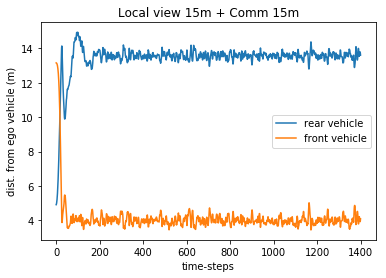

In [96]:
plt.plot(backDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='rear vehicle')
plt.plot(frontDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='front vehicle')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title("Local view 15m + Comm 15m")
plt.xlabel('time-steps')

In [98]:
len(agentPlanHomoLV15mComm15)

29

In [99]:
len(backDistHomoLV15mComm15m['complete'])

29

In [100]:
len(agentPlanHomoLV15mComm15[episodeToPlot])

2400

In [106]:
mask = np.zeros((len(agentPlanHomoLV15mComm15[episodeToPlot]), ))
for idx, act in enumerate(agentPlanHomoLV15mComm15[episodeToPlot]):
    if planEncode['lane-change'] == act:
        mask[idx] = 1.0
mask = np.multiply(mask, backDistHomoLV15mComm15m['complete'][episodeToPlot])

(1, 17)

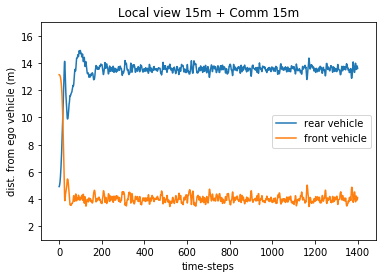

In [111]:
plt.plot(backDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='rear vehicle')
plt.plot(frontDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='front vehicle')
plt.scatter(np.arange(0, mask.shape[0])[0:1400], mask[0:1400], color='red')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title("Local view 15m + Comm 15m")
plt.xlabel('time-steps')
plt.ylim([1, 17])

Text(0.5, 0, 'time-steps')

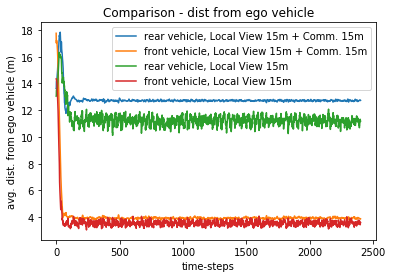

In [123]:
plt.plot(backDistHomoLV15mComm15m['complete'].mean(axis=0), label='rear vehicle, Local View 15m + Comm. 15m')
plt.plot(frontDistHomoLV15mComm15m['complete'].mean(axis=0), label='front vehicle, Local View 15m + Comm. 15m')
plt.plot(backDist['complete'].mean(axis=0), label='rear vehicle, Local View 15m')
plt.plot(frontDist['complete'].mean(axis=0), label='front vehicle, Local View 15m')
plt.legend()
plt.ylabel('avg. dist. from ego vehicle (m)')
plt.title("Comparison - dist from ego vehicle")
plt.xlabel('time-steps')
#plt.ylim([1, 35])